In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start='2014-10-07'
end='2024-10-07'
stock='TSLA'

data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2014-10-07 00:00:00+00:00,17.304667,17.304667,17.430668,17.048668,17.235332,67282500
2014-10-08 00:00:00+00:00,17.285334,17.285334,17.525333,16.842667,17.340000,75826500
2014-10-09 00:00:00+00:00,17.134001,17.134001,17.702667,16.959999,17.483334,110419500
2014-10-10 00:00:00+00:00,15.794000,15.794000,16.392668,15.680000,16.309334,193324500
2014-10-13 00:00:00+00:00,14.972667,14.972667,15.930667,14.733333,15.904667,169030500
...,...,...,...,...,...,...
2024-09-30 00:00:00+00:00,261.630005,261.630005,264.859985,255.770004,259.040009,80705700
2024-10-01 00:00:00+00:00,258.019989,258.019989,263.980011,248.529999,262.670013,87397600


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

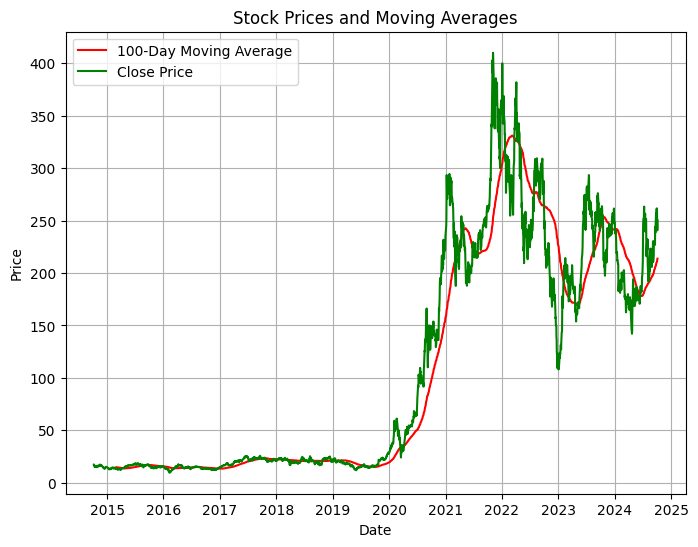

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='100-Day Moving Average')
plt.plot(data.Close, 'g', label='Close Price')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Price')  # Label for y-axis
plt.title('Stock Prices and Moving Averages')  # Title of the plot
plt.legend()  # Add a legend
plt.grid(True)  # Add gridlines for better readability
plt.show()


In [ ]:
ma_200_days=data.Close.rolling(200).mean()

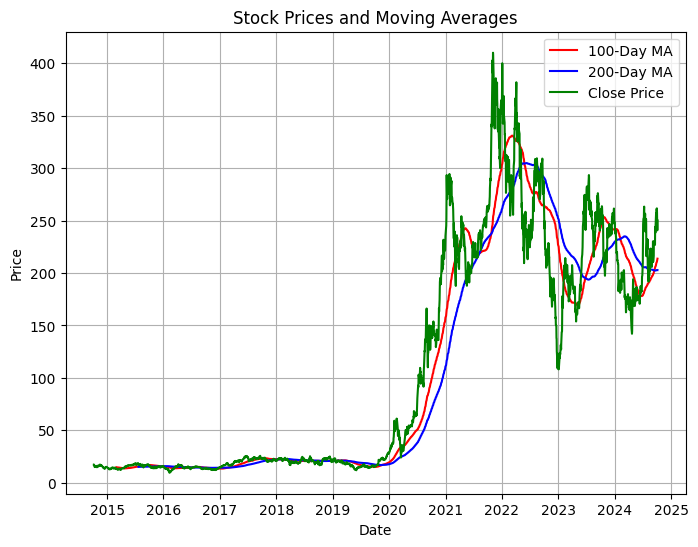

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='100-Day MA')
plt.plot(ma_200_days, 'b', label='200-Day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0], data_test.shape[0]

(2012, 504)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale=scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100: i])
  y.append(data_train_scale[i,0])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=200, batch_size=32, verbose=1)


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 337ms/step - loss: 0.0169
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - loss: 0.0052
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 301ms/step - loss: 0.0039
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0038
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - loss: 0.0030
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - loss: 0.0031
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - loss: 0.0029
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - loss: 0.0033
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - loss: 0.0030
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0026
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - loss: 0.0033
Epoch 12/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - loss: 0.0024
Epoch 13/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - loss: 0.0027
Epoch 14/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 0.0027
Epoch 15/200
60/60 ━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)


In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test

Ticker,TSLA
0,244.666672
1,242.666672
2,256.529999
3,241.456665
4,253.869995
...,...
599,261.630005
600,258.019989
601,249.020004
602,240.660004


In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100: i])
  y.append(data_test_scale[i,0])

x,y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step


In [ ]:
y_predict

array([[0.6635773 ],
       [0.6591406 ],
       [0.6374109 ],
       [0.61352956],
       [0.5579672 ],
       [0.52831864],
       [0.50626665],
       [0.5049486 ],
       [0.5249723 ],
       [0.47842064],
       [0.4868385 ],
       [0.50968647],
       [0.52877605],
       [0.48002067],
       [0.4708636 ],
       [0.4683955 ],
       [0.5121869 ],
       [0.5458646 ],
       [0.5453483 ],
       [0.5458502 ],
       [0.5427512 ],
       [0.5459057 ],
       [0.5097867 ],
       [0.49197242],
       [0.46734563],
       [0.43077785],
       [0.39768052],
       [0.35337403],
       [0.3600488 ],
       [0.41050813],
       [0.42092547],
       [0.40942183],
       [0.369512  ],
       [0.33605152],
       [0.32009524],
       [0.29326108],
       [0.2830399 ],
       [0.32708642],
       [0.36890382],
       [0.3692193 ],
       [0.34065318],
       [0.36072716],
       [0.3918783 ],
       [0.4067173 ],
       [0.3660465 ],
       [0.32859308],
       [0.30028877],
       [0.293

In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
from sklearn.metrics import r2_score

y_predict = y_predict.reshape(-1)
y = y.reshape(-1)

r2 = r2_score(y, y_predict)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9217


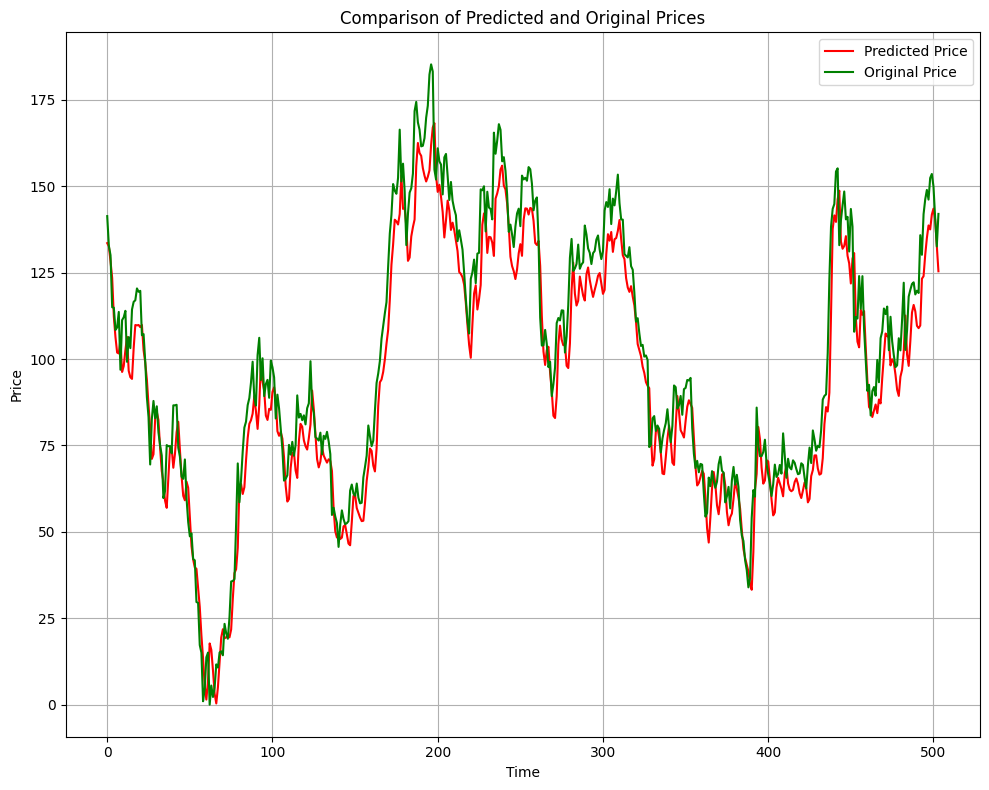

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Comparison of Predicted and Original Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save('Stock Prediction Model T.keras')

In [ ]:
!ls

 sample_data  'Stock Prediction Model T.keras'


In [ ]:
from google.colab import files
files.download('Stock Prediction Model T.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>